In [60]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [61]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [62]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [63]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [64]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [65]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [66]:
# Save references to each table
measurement = Base.classes.measurement
stations = Base.classes.station

In [67]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [68]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [69]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
oneyear_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= oneyear_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by dat
# Use Pandas Plotting with Matplotlib to plot the data
#precip_df = pd.DataFrame(precip_data, columns=["Date","Precipitation"])
#precip_df = precip_df.sort_values("Date")
#precip_df.head()

In [70]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df = pd.DataFrame(precip_data, columns=["Date","Precipitation"])
precip_df = precip_df.sort_values("Date")
precip_df.head()

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


In [71]:
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


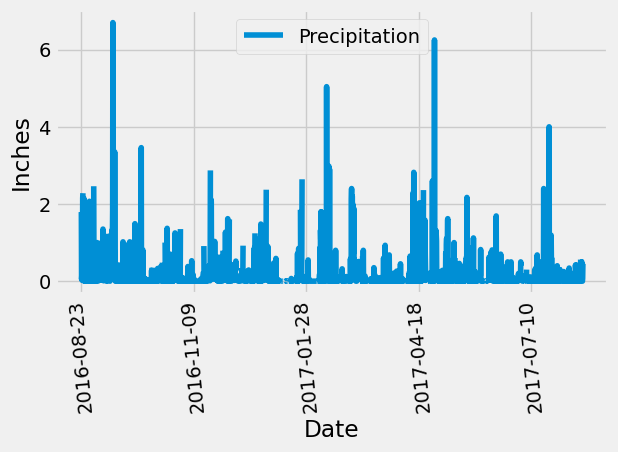

In [72]:
precip_df.plot(x="Date", y="Precipitation", rot= 95)
plt.ylabel("Inches")
plt.tight_layout()
plt.show()

# Exploratory Station Analysis

In [73]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurement.station).distinct().count()

9

In [74]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [78]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature_measure = session.query(func.avg(measurement.tobs), func.min(measurement.tobs),func.max(measurement.tobs)).filter(measurement.station=="USC005192")
print(f"the lowest temp was {temperature_measure[0][0]} degrees F")
#print(f"the highest temp was {temperature_measure[0][1]} degrees F")
#print(f"the avg temp was {np.round(temperature_measure[0][2],2)} degrees F")


the lowest temp was None degrees F


Text(0.5, 0, 'Temperature')

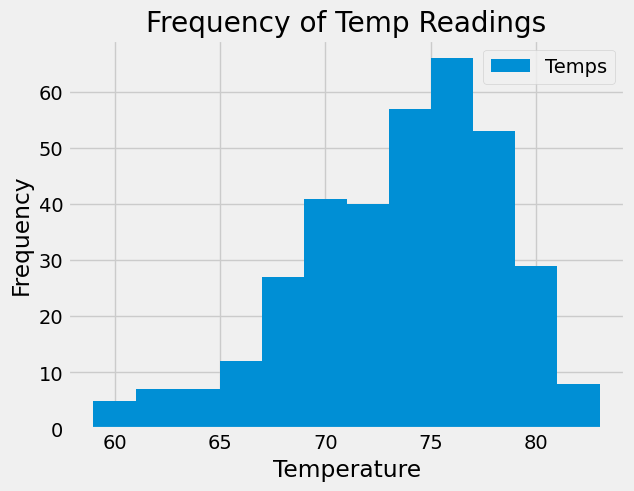

In [79]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_temperature = session.query(measurement.tobs).filter(measurement.station == "USC00519281").filter(measurement.date >= oneyear_ago).all()
stations_df = pd.DataFrame(active_station_temperature, columns=["Temps"])
stations_df.plot.hist(bins=12)
plt.title("Frequency of Temp Readings")
plt.ylabel("Frequency")
plt.xlabel("Temperature")


# Close Session

In [80]:
# Close Session
session.close()